In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
df= pd.read_excel("E:\\My Courses\\candyhierarchy2017.xlsx")
df.head()

,Internal ID,Q1: GOING OUT?,Q2: GENDER,Q3: AGE,Q4: COUNTRY,"Q5: STATE, PROVINCE, COUNTY, ETC",Q6 | 100 Grand Bar,Q6 | Anonymous brown globs that come in black and orange wrappers (a.k.a. Mary Janes),Q6 | Any full-sized candy bar,Q6 | Black Jacks,...,Q8: DESPAIR OTHER,Q9: OTHER COMMENTS,Q10: DRESS,Unnamed: 113,Q11: DAY,Q12: MEDIA [Daily Dish],Q12: MEDIA [Science],Q12: MEDIA [ESPN],Q12: MEDIA [Yahoo],"Click Coordinates (x, y)"
0,90258773,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,90272821,No,Male,44,USA,NM,MEH,DESPAIR,JOY,MEH,...,NaN,Bottom line is Twix is really the only candy w...,White and gold,NaN,Sunday,NaN,1.0,NaN,NaN,"(84, 25)"
2,90272829,NaN,Male,49,USA,Virginia,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,90272840,No,Male,40,us,or,MEH,DESPAIR,JOY,MEH,...,NaN,Raisins can go to hell,White and gold,NaN,Sunday,NaN,1.0,NaN,NaN,"(75, 23)"
4,90272841,No,Male,23,usa,exton pa,JOY,DESPAIR,JOY,DESPAIR,...,NaN,NaN,White and gold,NaN,Friday,NaN,1.0,NaN,NaN,"(70, 10)"


In [3]:
df.shape

(2460, 120)

In [4]:
df.info(120)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2460 entries, 0 to 2459
Data columns (total 120 columns):
Internal ID                                                                              int64
Q1: GOING OUT?                                                                           object
Q2: GENDER                                                                               object
Q3: AGE                                                                                  object
Q4: COUNTRY                                                                              object
Q5: STATE, PROVINCE, COUNTY, ETC                                                         object
Q6 | 100 Grand Bar                                                                       object
Q6 | Anonymous brown globs that come in black and orange wrappers	(a.k.a. Mary Janes)    object
Q6 | Any full-sized candy bar                                                            object
Q6 | Black Jacks             

In [5]:
df.isnull().sum()

Internal ID                                                                                  0
Q1: GOING OUT?                                                                             110
Q2: GENDER                                                                                  41
Q3: AGE                                                                                     84
Q4: COUNTRY                                                                                 64
Q5: STATE, PROVINCE, COUNTY, ETC                                                           100
Q6 | 100 Grand Bar                                                                         747
Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes)     734
Q6 | Any full-sized candy bar                                                              672
Q6 | Black Jacks                                                                           958
Q6 | Bonkers (the candy)                          

In [6]:
df.head()

df.drop(['Unnamed: 113', 'Click Coordinates (x, y)'], axis=1, inplace=True)

In [7]:
df.columns=df.columns.str[3:]

In [8]:
df.columns=df.columns.str.replace("|" ,"") 

In [9]:
df.columns=df.columns.str.replace(":","")

In [10]:
df=df.iloc[:,1:]

In [11]:
df.head()

,GOING OUT?,GENDER,AGE,COUNTRY,"STATE, PROVINCE, COUNTY, ETC",100 Grand Bar,Anonymous brown globs that come in black and orange wrappers (a.k.a. Mary Janes),Any full-sized candy bar,Black Jacks,Bonkers (the candy),...,York Peppermint Patties,JOY OTHER,DESPAIR OTHER,OTHER COMMENTS,DRESS,DAY,MEDIA [Daily Dish],MEDIA [Science],MEDIA [ESPN],MEDIA [Yahoo]
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,No,Male,44,USA,NM,MEH,DESPAIR,JOY,MEH,DESPAIR,...,DESPAIR,Mounds,NaN,Bottom line is Twix is really the only candy w...,White and gold,Sunday,NaN,1.0,NaN,NaN
2,NaN,Male,49,USA,Virginia,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,No,Male,40,us,or,MEH,DESPAIR,JOY,MEH,MEH,...,DESPAIR,"Reese's crispy crunchy bars, 5th avenue bars, ...",NaN,Raisins can go to hell,White and gold,Sunday,NaN,1.0,NaN,NaN
4,No,Male,23,usa,exton pa,JOY,DESPAIR,JOY,DESPAIR,MEH,...,JOY,NaN,NaN,NaN,White and gold,Friday,NaN,1.0,NaN,NaN


In [12]:
# Theoretically, 25 to 30% is the maximum missing values are allowed so..
max_number_of_nas = 700
df = df.loc[:, (df.isnull().sum(axis=0) <= max_number_of_nas)]

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2460 entries, 0 to 2459
Data columns (total 37 columns):
 GOING OUT?                                                                2350 non-null object
 GENDER                                                                    2419 non-null object
 AGE                                                                       2376 non-null object
 COUNTRY                                                                   2396 non-null object
 STATE, PROVINCE, COUNTY, ETC                                              2360 non-null object
 Any full-sized candy bar                                                  1788 non-null object
 Box'o'Raisins                                                             1772 non-null object
 Butterfinger                                                              1778 non-null object
 Cadbury Creme Eggs                                                        1777 non-null object
 Candy Corn                  

In [14]:
df.head()

,GOING OUT?,GENDER,AGE,COUNTRY,"STATE, PROVINCE, COUNTY, ETC",Any full-sized candy bar,Box'o'Raisins,Butterfinger,Cadbury Creme Eggs,Candy Corn,...,Milk Duds,Milky Way,Regular M&Ms,Peanut M&M’s,Nestle Crunch,Reese’s Peanut Butter Cups,Reese's Pieces,Snickers,Starburst,Twix
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,No,Male,44,USA,NM,JOY,DESPAIR,DESPAIR,MEH,MEH,...,MEH,JOY,JOY,MEH,JOY,JOY,JOY,MEH,MEH,JOY
2,NaN,Male,49,USA,Virginia,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,No,Male,40,us,or,JOY,DESPAIR,MEH,MEH,DESPAIR,...,DESPAIR,JOY,MEH,JOY,MEH,JOY,MEH,JOY,MEH,JOY
4,No,Male,23,usa,exton pa,JOY,DESPAIR,MEH,MEH,DESPAIR,...,MEH,JOY,JOY,JOY,JOY,JOY,JOY,NaN,JOY,JOY


In [15]:
df.isnull().sum()

 GOING OUT?                                                                110
 GENDER                                                                     41
 AGE                                                                        84
 COUNTRY                                                                    64
 STATE, PROVINCE, COUNTY, ETC                                              100
 Any full-sized candy bar                                                  672
 Box'o'Raisins                                                             688
 Butterfinger                                                              682
 Cadbury Creme Eggs                                                        683
 Candy Corn                                                                678
 Candy that is clearly just the stuff given out for free at restaurants    691
 Cash, or other forms of legal tender                                      680
 Dental paraphenalia                                

In [16]:
df=df.replace(np.nan,df.mode())

In [17]:
df.isnull().sum()

 GOING OUT?                                                                0
 GENDER                                                                    0
 AGE                                                                       0
 COUNTRY                                                                   0
 STATE, PROVINCE, COUNTY, ETC                                              0
 Any full-sized candy bar                                                  0
 Box'o'Raisins                                                             0
 Butterfinger                                                              0
 Cadbury Creme Eggs                                                        0
 Candy Corn                                                                0
 Candy that is clearly just the stuff given out for free at restaurants    0
 Cash, or other forms of legal tender                                      0
 Dental paraphenalia                                                       0

In [18]:
df.head()

,GOING OUT?,GENDER,AGE,COUNTRY,"STATE, PROVINCE, COUNTY, ETC",Any full-sized candy bar,Box'o'Raisins,Butterfinger,Cadbury Creme Eggs,Candy Corn,...,Milk Duds,Milky Way,Regular M&Ms,Peanut M&M’s,Nestle Crunch,Reese’s Peanut Butter Cups,Reese's Pieces,Snickers,Starburst,Twix
0,No,Male,40,USA,California,JOY,DESPAIR,JOY,JOY,DESPAIR,...,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY
1,No,Male,44,USA,NM,JOY,DESPAIR,DESPAIR,MEH,MEH,...,MEH,JOY,JOY,MEH,JOY,JOY,JOY,MEH,MEH,JOY
2,No,Male,49,USA,Virginia,JOY,DESPAIR,JOY,JOY,DESPAIR,...,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY
3,No,Male,40,us,or,JOY,DESPAIR,MEH,MEH,DESPAIR,...,DESPAIR,JOY,MEH,JOY,MEH,JOY,MEH,JOY,MEH,JOY
4,No,Male,23,usa,exton pa,JOY,DESPAIR,MEH,MEH,DESPAIR,...,MEH,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY


In [19]:
df.columns

Index([' GOING OUT?', ' GENDER', ' AGE', ' COUNTRY',
       ' STATE, PROVINCE, COUNTY, ETC', ' Any full-sized candy bar',
       ' Box'o'Raisins', ' Butterfinger', ' Cadbury Creme Eggs', ' Candy Corn',
       ' Candy that is clearly just the stuff given out for free at restaurants',
       ' Cash, or other forms of legal tender', ' Dental paraphenalia',
       ' Glow sticks', ' Gummy Bears straight up', ' Hard Candy',
       ' Healthy Fruit', ' Hershey's Dark Chocolate',
       ' Hershey’s Milk Chocolate', ' Hershey's Kisses',
       ' Jolly Rancher (bad flavor)', ' Jolly Ranchers (good flavor)',
       ' Junior Mints', ' Kit Kat', ' Licorice (not black)',
       ' Licorice (yes black)', ' Lollipops', ' Milk Duds', ' Milky Way',
       ' Regular M&Ms', ' Peanut M&M’s', ' Nestle Crunch',
       ' Reese’s Peanut Butter Cups', ' Reese's Pieces', ' Snickers',
       ' Starburst', ' Twix'],
      dtype='object')

In [20]:
df.columns = df.columns.str.lstrip()
df.columns

Index(['GOING OUT?', 'GENDER', 'AGE', 'COUNTRY',
       'STATE, PROVINCE, COUNTY, ETC', 'Any full-sized candy bar',
       'Box'o'Raisins', 'Butterfinger', 'Cadbury Creme Eggs', 'Candy Corn',
       'Candy that is clearly just the stuff given out for free at restaurants',
       'Cash, or other forms of legal tender', 'Dental paraphenalia',
       'Glow sticks', 'Gummy Bears straight up', 'Hard Candy', 'Healthy Fruit',
       'Hershey's Dark Chocolate', 'Hershey’s Milk Chocolate',
       'Hershey's Kisses', 'Jolly Rancher (bad flavor)',
       'Jolly Ranchers (good flavor)', 'Junior Mints', 'Kit Kat',
       'Licorice (not black)', 'Licorice (yes black)', 'Lollipops',
       'Milk Duds', 'Milky Way', 'Regular M&Ms', 'Peanut M&M’s',
       'Nestle Crunch', 'Reese’s Peanut Butter Cups', 'Reese's Pieces',
       'Snickers', 'Starburst', 'Twix'],
      dtype='object')

In [21]:
df.drop(['STATE, PROVINCE, COUNTY, ETC'], axis=1, inplace=True)

In [22]:
df.head()

,GOING OUT?,GENDER,AGE,COUNTRY,Any full-sized candy bar,Box'o'Raisins,Butterfinger,Cadbury Creme Eggs,Candy Corn,Candy that is clearly just the stuff given out for free at restaurants,...,Milk Duds,Milky Way,Regular M&Ms,Peanut M&M’s,Nestle Crunch,Reese’s Peanut Butter Cups,Reese's Pieces,Snickers,Starburst,Twix
0,No,Male,40,USA,JOY,DESPAIR,JOY,JOY,DESPAIR,DESPAIR,...,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY
1,No,Male,44,USA,JOY,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,...,MEH,JOY,JOY,MEH,JOY,JOY,JOY,MEH,MEH,JOY
2,No,Male,49,USA,JOY,DESPAIR,JOY,JOY,DESPAIR,DESPAIR,...,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY
3,No,Male,40,us,JOY,DESPAIR,MEH,MEH,DESPAIR,DESPAIR,...,DESPAIR,JOY,MEH,JOY,MEH,JOY,MEH,JOY,MEH,JOY
4,No,Male,23,usa,JOY,DESPAIR,MEH,MEH,DESPAIR,DESPAIR,...,MEH,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY,JOY


In [23]:
df["AGE"].unique()

array([40, 44, 49, 23, 53, 33, 43, 56, 64, 37, 59, 48, 54, 36, 45, 25, 34,
       35, 38, 58, 50, 47, 16, 52, 63, 65, 41, 27, 31, 61, 46, 42, 62, 29,
       39, 32, 28, 69, 67, 30, 22, 26, 51, 70, 24, 18, 19, 'Old enough',
       57, 60, 66, 12, 'Many', 55, 72, '?', 21, 11, 'no', 9, 68, 20, 6,
       10, 71, 90, 13, '45-55', 312, 99, 7, 'hahahahaha', 88, 39.4, 74,
       102, 'older than dirt', 17, 15, 8, 75, '5u', 'Enough',
       'See question 2', '24-50', 14, 'Over 50', 100, 76, 1000,
       'sixty-nine', '46 Halloweens.', 'ancient', 77, 'OLD', 'old', 73,
       70.5, 1, 'MY NAME JEFF', 4, '59 on the day after Halloween',
       'old enough', 'your mom',
       'I can remember when Java was a cool new language', '60+'],
      dtype=object)

In [24]:
#so we now need to clean this valuesin columns ["AGE","COUNTRY"].
# also we need to change the type of AGE column to numeric.
df["AGE"] = pd.to_numeric(df["AGE"], errors='coerce')

In [25]:
df["AGE"]=df.AGE.replace(r"[^0-9]+",'')

In [26]:
df["AGE"].unique()

array([  40. ,   44. ,   49. ,   23. ,   53. ,   33. ,   43. ,   56. ,
         64. ,   37. ,   59. ,   48. ,   54. ,   36. ,   45. ,   25. ,
         34. ,   35. ,   38. ,   58. ,   50. ,   47. ,   16. ,   52. ,
         63. ,   65. ,   41. ,   27. ,   31. ,   61. ,   46. ,   42. ,
         62. ,   29. ,   39. ,   32. ,   28. ,   69. ,   67. ,   30. ,
         22. ,   26. ,   51. ,   70. ,   24. ,   18. ,   19. ,    nan,
         57. ,   60. ,   66. ,   12. ,   55. ,   72. ,   21. ,   11. ,
          9. ,   68. ,   20. ,    6. ,   10. ,   71. ,   90. ,   13. ,
        312. ,   99. ,    7. ,   88. ,   39.4,   74. ,  102. ,   17. ,
         15. ,    8. ,   75. ,   14. ,  100. ,   76. , 1000. ,   77. ,
         73. ,   70.5,    1. ,    4. ])

In [27]:
df["AGE"].dropna(inplace=True)

In [28]:
df["AGE"].isnull().sum()

0

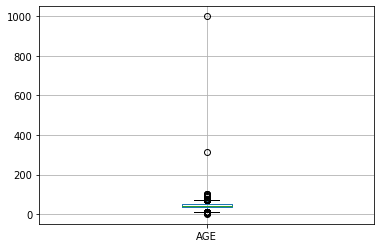

In [29]:
df.boxplot(column=["AGE"])
plt.show()

In [30]:
new_df=df[['AGE']]
Q1 = new_df.quantile(0.25)
Q3 = new_df.quantile(0.75)
IQR = Q3-Q1
minimum = Q1 - 1.5*IQR
maximum = Q3 + 1.5*IQR
condition = (new_df <= maximum) & (new_df >= minimum)
condition = condition.all(axis=1)
df=df[condition]

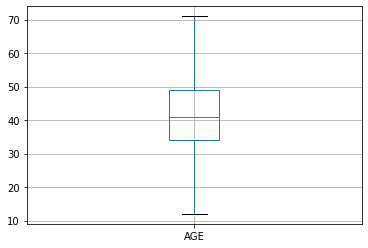

In [31]:
df.boxplot(column=["AGE"])
plt.show()

In [32]:
df=df.apply(lambda x: x.astype(str).str.lower())

In [33]:
usa=['USA ','Us','usa','usa ','us','murica','united states','united states ','united states of america','u.s.a.','usausausa','america','united states of america '
    ,'unhinged states','us of a','unites states','the united states','unied states','u s','u.s.','the united states of america','unite states',
    'usa? hard to tell anymore..', 'merica', 'usas','united state','new york','united sates','california','i pretend to be from canada, but i am really from the united states.',
    'united stated','ahem....amerca','united ststes','united statss','usa! usa! usa!', 'usaa','alaska','n. america','ussa','u.s. ',
    'u s a', 'united statea','usa usa usa!!!!','united staes',"'merica",'cascadia','trumpistan','USA']

united_kindom=['uk','united kingdom','england','u.k. ','uk ','ireland','iceland','endland','ireland ']

canada=['canada', 'canada ','can', 'canae','canada`' ]

other=['35','north carolina ','europe','earth', 'pittsburgh', '45', '32', 'a', 'ud','46',
      'atlantis', 'murrika','narnia', '1', 'subscribe to dm4uz3 on youtube', "i don't know anymore", 'fear and loathing','new jersey']
for i in df['COUNTRY']:
    if i in  usa:
        df['COUNTRY'].replace(i,'usa',inplace=True)
    elif i in united_kindom:
        df['COUNTRY'].replace(i,'united kindom',inplace=True)
    elif i in canada:
        df['COUNTRY'].replace(i,'canada',inplace=True)
    elif i in other:
        df['COUNTRY'].replace(i,np.nan,inplace=True)
df['COUNTRY'].replace('the netherlands','netherlands',inplace=True)
df['COUNTRY'].replace('france ','france',inplace=True)
df['COUNTRY'].replace('korea','south korea',inplace=True)

In [37]:
df["COUNTRY"].dropna(inplace=True)
df['COUNTRY'].isnull().sum()

0

In [38]:
df.head()

,GOING OUT?,GENDER,AGE,COUNTRY,Any full-sized candy bar,Box'o'Raisins,Butterfinger,Cadbury Creme Eggs,Candy Corn,Candy that is clearly just the stuff given out for free at restaurants,...,Milk Duds,Milky Way,Regular M&Ms,Peanut M&M’s,Nestle Crunch,Reese’s Peanut Butter Cups,Reese's Pieces,Snickers,Starburst,Twix
0,no,male,40.0,usa,joy,despair,joy,joy,despair,despair,...,joy,joy,joy,joy,joy,joy,joy,joy,joy,joy
1,no,male,44.0,usa,joy,despair,despair,meh,meh,despair,...,meh,joy,joy,meh,joy,joy,joy,meh,meh,joy
2,no,male,49.0,usa,joy,despair,joy,joy,despair,despair,...,joy,joy,joy,joy,joy,joy,joy,joy,joy,joy
3,no,male,40.0,usa,joy,despair,meh,meh,despair,despair,...,despair,joy,meh,joy,meh,joy,meh,joy,meh,joy
4,no,male,23.0,usa,joy,despair,meh,meh,despair,despair,...,meh,joy,joy,joy,joy,joy,joy,joy,joy,joy


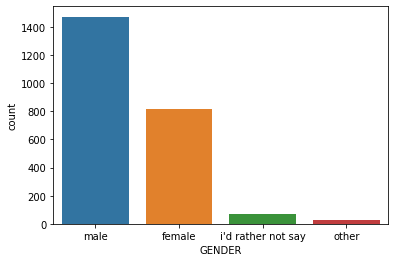

In [39]:
sns.countplot(x="GENDER" ,data=df )
plt.show()

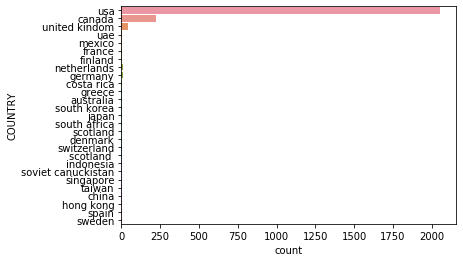

In [42]:
sns.countplot(y="COUNTRY" ,data=df )
plt.show()

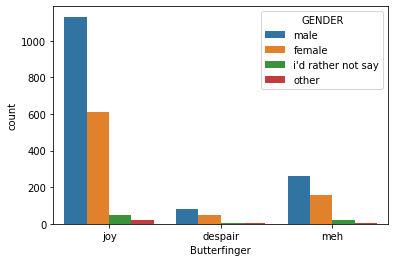

In [43]:
sns.countplot(x="Butterfinger" ,data=df ,hue="GENDER" )
plt.show()

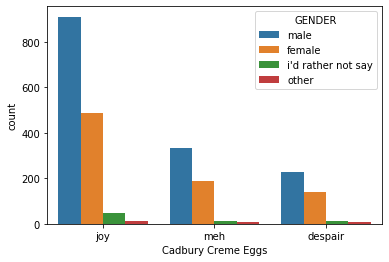

In [44]:
sns.countplot(x="Cadbury Creme Eggs" ,data=df ,hue="GENDER" )
plt.show()

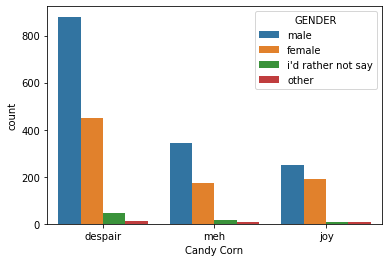

In [45]:
sns.countplot(x="Candy Corn" ,data=df ,hue="GENDER" )
plt.show()

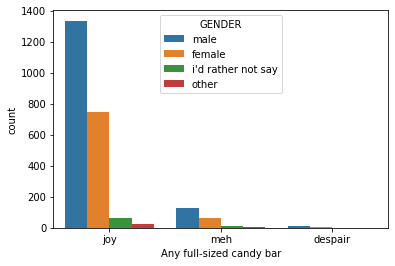

In [46]:
sns.countplot(x="Any full-sized candy bar" ,data=df ,hue="GENDER" )
plt.show()

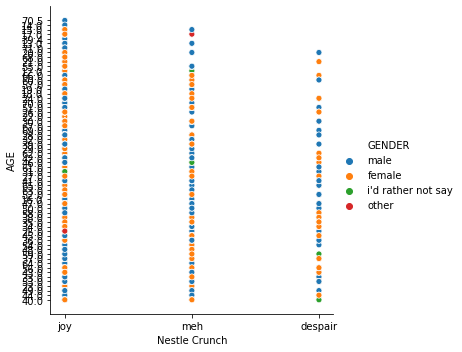

In [49]:
sns.relplot(x="Nestle Crunch",y="AGE",data=df,kind="scatter",hue="GENDER")